In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('Listings.csv', delimiter = ',', low_memory=False, encoding="ISO-8859-1")
df_newyork = data.copy()
df_newyork.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [162]:
filtered_df = df_newyork[df_newyork['city'] == 'New York']
filtered_df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [163]:
filtered_df = filtered_df[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
filtered_df

,host_since,neighbourhood,city,accommodates,price
9220,2013-10-23,Lower East Side,New York,3,110
9221,2013-10-02,Harlem,New York,2,99
9222,2014-09-27,Crown Heights,New York,6,220
9223,2014-10-18,Nolita,New York,2,215
9224,2012-10-14,Midtown,New York,3,300
...,...,...,...,...,...
268684,2014-06-29,Williamsburg,New York,5,115
268685,2014-06-02,Williamsburg,New York,2,140
268686,2016-01-01,West Village,New York,2,100
268687,2021-01-02,Bushwick,New York,5,188


In [164]:
filtered_df['host_since'] 

9220      2013-10-23
9221      2013-10-02
9222      2014-09-27
9223      2014-10-18
9224      2012-10-14
             ...    
268684    2014-06-29
268685    2014-06-02
268686    2016-01-01
268687    2021-01-02
273167    2012-01-12
Name: host_since, Length: 37012, dtype: object

In [165]:
filtered_df['host_since'] = pd.to_datetime(filtered_df['host_since'], format = '%Y-%m-%d')
filtered_df['host_since']

9220     2013-10-23
9221     2013-10-02
9222     2014-09-27
9223     2014-10-18
9224     2012-10-14
            ...    
268684   2014-06-29
268685   2014-06-02
268686   2016-01-01
268687   2021-01-02
273167   2012-01-12
Name: host_since, Length: 37012, dtype: datetime64[ns]

In [166]:
filtered_df.shape

(37012, 5)

In [167]:
filtered_df

,host_since,neighbourhood,city,accommodates,price
9220,2013-10-23,Lower East Side,New York,3,110
9221,2013-10-02,Harlem,New York,2,99
9222,2014-09-27,Crown Heights,New York,6,220
9223,2014-10-18,Nolita,New York,2,215
9224,2012-10-14,Midtown,New York,3,300
...,...,...,...,...,...
268684,2014-06-29,Williamsburg,New York,5,115
268685,2014-06-02,Williamsburg,New York,2,140
268686,2016-01-01,West Village,New York,2,100
268687,2021-01-02,Bushwick,New York,5,188


In [168]:
filtered_df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2733
Bedford-Stuyvesant    2711
Harlem                1972
Bushwick              1678
Hell's Kitchen        1506
                      ... 
Huguenot                 1
Woodrow                  1
Lighthouse Hill          1
Willowbrook              1
Castle Hill              1
Name: count, Length: 220, dtype: int64

In [169]:
values = filtered_df['neighbourhood'].value_counts()

In [170]:
cities_to_keep = values[values >=  500].index

In [171]:
filtered_df = filtered_df[filtered_df['neighbourhood'].isin(cities_to_keep)]

In [172]:
filtered_df

,host_since,neighbourhood,city,accommodates,price
9220,2013-10-23,Lower East Side,New York,3,110
9221,2013-10-02,Harlem,New York,2,99
9222,2014-09-27,Crown Heights,New York,6,220
9224,2012-10-14,Midtown,New York,3,300
9225,2013-09-21,Lower East Side,New York,2,120
...,...,...,...,...,...
268684,2014-06-29,Williamsburg,New York,5,115
268685,2014-06-02,Williamsburg,New York,2,140
268686,2016-01-01,West Village,New York,2,100
268687,2021-01-02,Bushwick,New York,5,188


In [173]:
filtered_df['city'].unique()

array(['New York'], dtype=object)

In [174]:
filtered_df['accommodates'].unique()

array([ 3,  2,  6,  4,  1,  8,  5,  7, 10,  9, 13, 12, 16, 15, 14, 11,  0],
      dtype=int64)

In [175]:
filtered_df['accommodates'].min()

0

In [176]:
filtered_df['accommodates'].max()

16

In [177]:
filtered_df['accommodates'].mean()

2.750997325851563

In [178]:
filtered_df['price'][filtered_df['price'].isna()]

Series([], Name: price, dtype: int64)

In [179]:
filtered_df['price'].min()

0

In [180]:
filtered_df['price'].max()

10000

In [181]:
filtered_df['price'].mean()

147.35119021524704

In [182]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,host_since,neighbourhood,city,accommodates,price
0,2013-10-23,Lower East Side,New York,3,110
1,2013-10-02,Harlem,New York,2,99
2,2014-09-27,Crown Heights,New York,6,220
3,2012-10-14,Midtown,New York,3,300
4,2013-09-21,Lower East Side,New York,2,120
...,...,...,...,...,...
22806,2014-06-29,Williamsburg,New York,5,115
22807,2014-06-02,Williamsburg,New York,2,140
22808,2016-01-01,West Village,New York,2,100
22809,2021-01-02,Bushwick,New York,5,188


In [183]:
filtered_df.isna().sum()

host_since       11
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [184]:
filtered_df.describe()

,host_since,accommodates,price
count,22800,22811.000000,22811.000000
mean,2015-07-30 02:26:20.210526208,2.750997,147.351190
min,2008-08-22 00:00:00,0.000000,0.000000
25%,2013-09-03 00:00:00,2.000000,65.000000
50%,2015-05-19 00:00:00,2.000000,100.000000
75%,2017-05-19 00:00:00,4.000000,160.000000
max,2021-02-02 00:00:00,16.000000,10000.000000
std,NaN,1.760416,289.503425


In [185]:
filtered_df.query("accommodates == 0").count()

host_since       8
neighbourhood    8
city             8
accommodates     8
price            8
dtype: int64

In [186]:
filtered_df = filtered_df[filtered_df['accommodates'] != 0]

In [187]:
filtered_df = filtered_df[filtered_df['price'] != 0]
filtered_df

,host_since,neighbourhood,city,accommodates,price
0,2013-10-23,Lower East Side,New York,3,110
1,2013-10-02,Harlem,New York,2,99
2,2014-09-27,Crown Heights,New York,6,220
3,2012-10-14,Midtown,New York,3,300
4,2013-09-21,Lower East Side,New York,2,120
...,...,...,...,...,...
22806,2014-06-29,Williamsburg,New York,5,115
22807,2014-06-02,Williamsburg,New York,2,140
22808,2016-01-01,West Village,New York,2,100
22809,2021-01-02,Bushwick,New York,5,188


In [188]:
NYork_neighbourhood = (
    filtered_df
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

NYork_neighbourhood

,price
neighbourhood,
Bushwick,84.500596
Washington Heights,94.867299
Astoria,103.705882
Bedford-Stuyvesant,104.412394
Crown Heights,111.743567
Harlem,112.512677
East Harlem,123.200549
Greenpoint,130.420074
Williamsburg,131.408275


In [189]:
NYork_accomodates = (
    filtered_df
    .query("neighbourhood == 'Harlem'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

NYork_accomodates

,price
accommodates,
1,67.063291
2,83.368834
3,109.759358
4,152.955466
5,175.347222
6,218.297872
8,231.833333
7,253.875000
15,275.000000


In [190]:
NYork_over_time = (
    filtered_df
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
         })
)

NYork_over_time

,neighbourhood,price
host_since,,
2008-12-31,12,83.083333
2009-12-31,156,131.333333
2010-12-31,440,142.359091
2011-12-31,1220,174.570492
2012-12-31,2100,160.919524
2013-12-31,2769,145.661250
2014-12-31,3500,137.306000
2015-12-31,3607,132.635708
2016-12-31,2698,155.335804


In [191]:
# Visualization

In [192]:
# Bar Plot for Avg price by neighbourhood in New York

<Figure size 2400x2400 with 0 Axes>

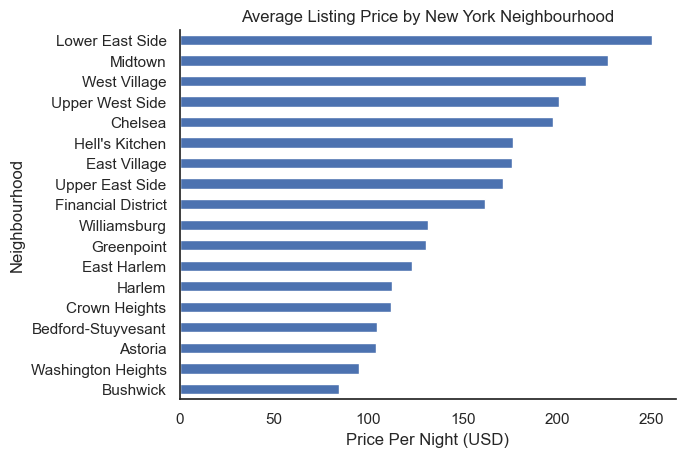

In [195]:
sns.set_style("white")
plt.figure(figsize = (24,24)) 
(NYork_neighbourhood
.plot
.barh(
    title = "Average Listing Price by New York Neighbourhood",
    xlabel =  "Price Per Night (USD)",
    ylabel =  "Neighbourhood",
    legend = None
)
)

sns.despine()

In [196]:
# Bar plot

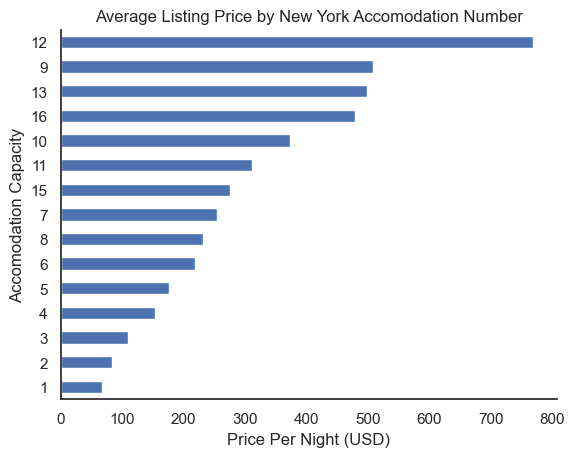

In [197]:
sns.set_style("white")
(NYork_accomodates
.plot
.barh(
    title = "Average Listing Price by New York Accomodation Number",
    xlabel =  "Price Per Night (USD)",
    ylabel =  "Accomodation Capacity",
    legend = None
)
)

sns.despine()


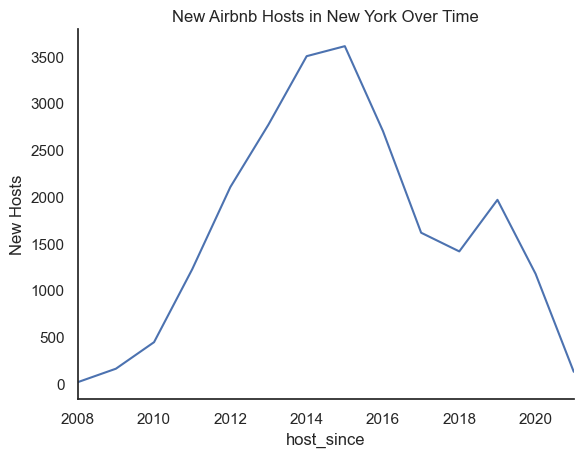

In [198]:
NYork_over_time["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New Airbnb Hosts in New York Over Time"
)

sns.despine()

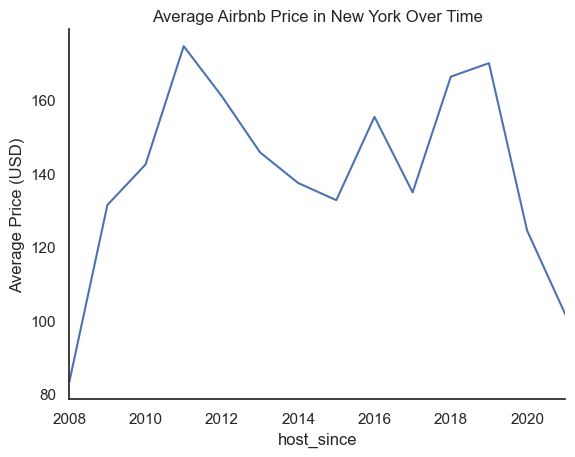

In [204]:
NYork_over_time["price"].plot(
    ylabel = "Average Price (USD)",
    title = "Average Airbnb Price in New York Over Time"
)
sns.despine()
plt.show()

Text(0.5, 1.0, 'Sharp Decline of Hosts since 2016 resulted in consistent prices till Covid')

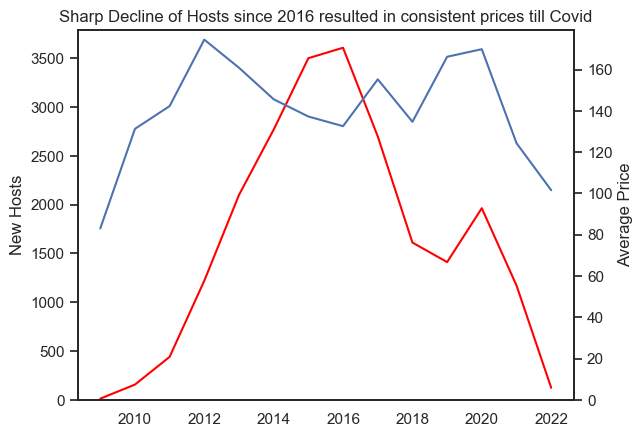

In [211]:
fig, ax = plt.subplots()

ax.plot(
    NYork_over_time.index,
    NYork_over_time["neighbourhood"],
    label = "New Hosts",
    c = "red"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
ax2.plot(
    NYork_over_time.index,
    NYork_over_time["price"],
    label = "Average Price"
)
ax.set_ylim(0)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("Sharp Decline of Hosts since 2016 resulted in consistent prices till Covid")